In [1]:
from IPython.display import Image
%matplotlib inline

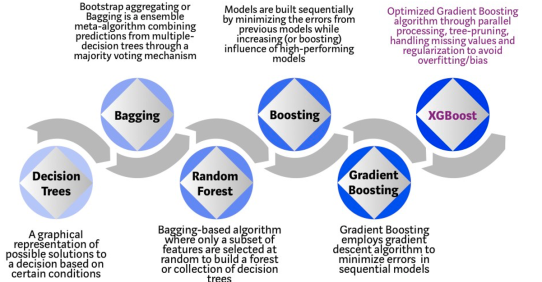

In [2]:
Image(filename='./figure1.png', width=800)

### XGBoost

- XGBoost algoritması (eXtreme Gradient Boosting), karar agacı ve gradient boosting temelli bir makine öğrenme algoritmasıdır. 2016 yılında Washington Üniversitesinden Tiangi Chen ve Carlos Guestrin tarafından makale olarak SIGKDD konferasında sunulmuştur.

- XGBoost, son yıllarda yaygın bir şekilde kullanılmaktadır. Bunun en büyüp sebebi diğer algoritmalara göre hız ve performans olarak daha avantajlı olmasıdır. Buna ek olarak, performansı iyileştiren ve aşırı öğrenmeyi azaltan bir dizi regularization içermektedir.

- Hem XGBoost hem de Gradient Boosting yöntemi topluluk temellidir. Yani zayıf öğrenenler kullanarak güçlü bir öğrenici elde etmeye çalışmaktadır. Güçlü öğrenici, temel bir öğrenici ile başlayarak yinemeli olarak eğitilmektedir.

- XGBoost'un Gradient Boosting metoduna göre avantajı, hem sistem optimizasyonu hem algoritmik farklılıklardır.

- XGBoost, farklı regülasyon teknikleri kullanarak, ağaçların karmaşıklığını kontrol ederek daha iyi bir performans elde etmeyi başarmıştır (Patrous, 2018 ve TEZ).

- XGBoost algoritmasında, verilen eğitim setinde en iyi öznitelikleri bulmak ve modelin performansını ölçmek için amaç fonksiyonu tanımlanır. Amaç fonksiyonu,

$$Objective(\theta)=L(\theta) + \Omega(\theta)$$

- L, kayıp fonksiyonu olup, modelin eğitim verileri üzerindeki öngörüsünü ölçmektedir. $\Omega$ ise regülasyon terimidir. $\Omega$ modelin karmaşıklığını kontrol edip, aşırı öğrenmeyi azaltmaktadır.

- Yaygın olarak kullanılan, eğitim kaybının ortalama kare hatası,

$$L(\theta) = \sum_{i=1}(y_i - \hat y_i)^2$$

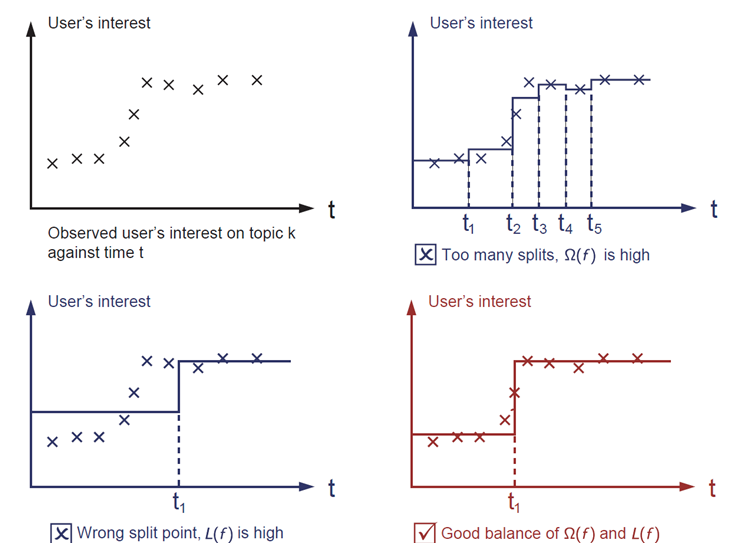

In [3]:
Image(filename='./regularization_term.png', width=800)

#### Karar Ağacı Toplulukları

- Ağaç topluluk modeli, bir dizi sınıflandırma ve regresyon ağacından (CART) oluşur. Burada, birinin varsayımsal bir bilgisayar oyunu X'i beğenip beğenmeyeceğini sınıflandıran basit bir CART örneği incelenmiştir:

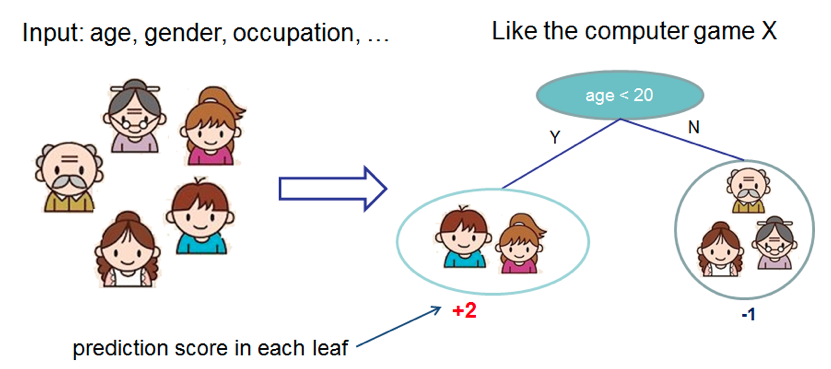

In [4]:
Image(filename='./xgboost1.png', width=600)

- Yukarıdaki örnekte aile üyeleri farklı yapraklara ayrılmış. Ayrıca her yaprağa karşılık skor verilmiş. CART'ta, yaprakların her biri ile gerçek bir puan ilişkilendirilir ve bu da bize sınıflandırmanın ötesine geçen daha zengin yorumlar sağlar.

- Genellikle tek bir ağaç, topluluk yöntemleri kadar güçlü değildir. 

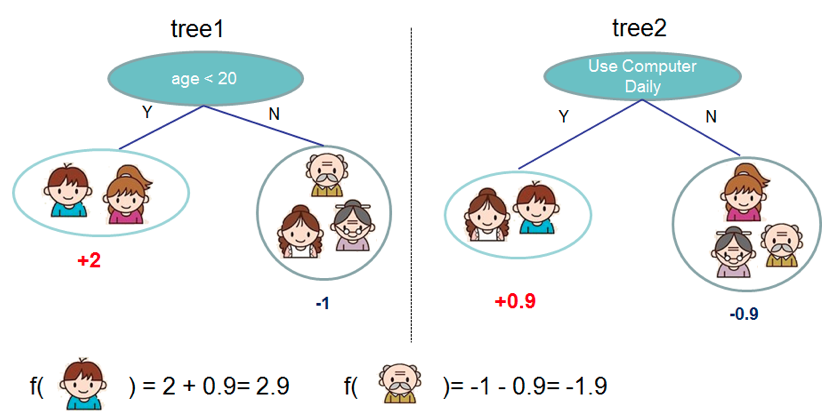

In [5]:
Image(filename='./xgboost2.png', width=600)

- İki ağaçtan oluşan bir topluluk örneği. Her ağacın tahmin puanları, nihai puanı belirlemek için toplanır. Örneğe bakacak olursak, iki ağacın birbirini tamamlamaya çalıştığı görülmektedir. Modelimizi matematiksel olarak ifade edersek:

$$\hat y_i = \sum_{k=1}^{K}f_k(x_i), f_k \in \mathcal{F}$$

- K, ağaç sayısı
- f, fonksiyon uzayı,
- $\mathcal{F}$ ise olası bütün karar ağaçları kümesini temsil eder.

Amaç fonksiyonu, 
$$Obj(\theta) = \sum_{i}^{n}l(y_i, \hat y_i) + \sum_{k=1}^{K}\Omega(f_k) $$

- 𝑙 fonksiyonu, tahminle doğru değer arasındaki farkı ifade eder. 
- $\Omega$ düzeltme fonksiyonunu ifade eder.

- Rastgele ormanlarda (Random Forest) kullanılan temel nedir? Ağaç toplulukları! 
- Rastgele ormanlar ve boosted ağaçlar (boosted trees) aslında aynı modellerdir; iki algoritma arasındaki temel fark ise onları nasıl eğittiğimizden kaynaklanıyor.

#### Tree Boosting

- Boosting, bir çok zayıf öğreniciyi bir araya getirerek bir güçlü öğrenici (strong learner) oluşturmak anlamına gelir. Bir çok boosting metodunun ana fikri, tahmin edicileri ardışık olarak eğitmektir.

- Boosting yapısı ise bağımsız paralel yapılar yerine, sırayla birbirinin üzerine eklenen yapıya sahiptir. Bu tahmin yapma yöntemleri, bir önceki tahminlerin hatalarından öğrenilen mantığı geliştirerek sonuca daha çok yaklaşmayı hedefleyen modellerdir. Temelde, bu tip modellerde her yeni karar ağacı belirli ağırlık oranlarında bir öncekinin üzerine eklenir ve model her adımda iyileştirilerek istenen hedefe doğru ilerler.

Amaç fonksiyonu, 
$$Obj(\theta) = \sum_{i=1}^{n}l(y_i, \hat y_i ^{(t)}) + \sum_{i=1}^{t}\Omega(f_i) $$

### Additive Training

- Ağaçların parametreleri nelerdir?
- Ağacın yapısını öğrenmek, geleneksel optimazyon probleminden daha zordur. Yani tüm ağaçları tek seferde öğrenmek zor bir problem.
- Bu yerine, her seferde iyileştirme yapılıp yeni ağaç eklenir.

\begin{split}\hat{y}_i^{(0)} &= 0\\
\hat{y}_i^{(1)} &= f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)\\
\hat{y}_i^{(2)} &= f_1(x_i) + f_2(x_i)= \hat{y}_i^{(1)} + f_2(x_i)\\
&\dots\\
\hat{y}_i^{(t)} &= \sum_{k=1}^t f_k(x_i)= \hat{y}_i^{(t-1)} + f_t(x_i)\end{split}

**Her adımda hangi ağacı istiyoruz?**
- Doğal olarak amaç fonksiyonumuzu optimize eden bir şey eklememiz gerekiyor.

\begin{split}\text{obj}^{(t)} & = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t\Omega(f_i) \\
          & = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t) + \mathrm{constant}\end{split}

- $f_t$, hatayı minimize edene kadar eklenen fonksiyonları ifade eder. Her bir adımda yeni bir fonksiyon ilave edilerek istenen amaca doğru ilerlenir.

- Kayıp fonksiyonu olarak ortalama hata karesi (Mean Squared Error) kullanırsa, amaç fonksiyonu,

\begin{split}\text{obj}^{(t)} & = \sum_{i=1}^n (y_i - (\hat{y}_i^{(t-1)} + f_t(x_i)))^2 + \sum_{i=1}^t\Omega(f_i) \\
          & = \sum_{i=1}^n [2(\hat{y}_i^{(t-1)} - y_i)f_t(x_i) + f_t(x_i)^2] + \Omega(f_t) + \mathrm{constant}\end{split}

\begin{split}g_i &= \partial_{\hat{y}_i^{(t-1)}} l(y_i, \hat{y}_i^{(t-1)})\\
h_i &= \partial_{\hat{y}_i^{(t-1)}}^2 l(y_i, \hat{y}_i^{(t-1)})\end{split}

- Bu fonksiyonda 𝑔𝑖 kayıp fonksiyonunun birinci dereceden diferansiyelini, ℎ𝑖 ise ikinci dereceden diferansiyelini ifade eder.
- Tüm sabitler kaldırıldıktan sonra, t adımdaki amaç fonksiyonu,

\begin{split}\sum_{i=1}^n [g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i)] + \Omega(f_t)\end{split}

- Bu, yeni ağaç için optimizasyon hedefimiz haline geliyor.

#### Model Karmaşıklığı

- Sırada düzeltme terimi var!

- Modelimizin son kısmı Ω(f) ile ifade edilen karmaşık  olarak ifade edilen, düzeltme terimidir. 
- Her makine öğrenmesi modelinde olduğu gibi burada da modelin düzeltme kısmı bulunmaktadır. 

\begin{split}\Omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^T w_j^2\end{split} 

- XGBoost modelinde yaprakların optimum ayrılması için aşağıdaki formül kullanılmaktadır. Burada hesapladığımız değerler ne kadar küçükse karar ağacının yapısı o kadar kalitelidir.

\begin{split}Gain = \frac{1}{2} \left[\frac{G_L^2}{H_L+\lambda}+\frac{G_R^2}{H_R+\lambda}-\frac{(G_L+G_R)^2}{H_L+H_R+\lambda}\right] - \gamma\end{split}

XGBoost'un GBM'e göre avantajı, hem sistem optimizasyonu hem de algoritmik geliştirmelerdir.

**Sistem Optimizasyonları:**

*Paralel Çalıştırma:* 
- XGBoost, paralel çalışma altyapısına sahip olduğu için karar ağaçlarını çok daha hılzı oluşturmaktadır.Bunu yapabilmesinde iç ve dış döngüler arasında geçiş yapabiliyor olması yatmaktadır. Normalde dış döngüler, karar-ağaçlarının yapraklarını oluştururken iç döngüler öznitelikleri hesaplar. Ancak öznitelikler hesaplanmadan agacin yapraklari olusmayacagi icin paralelizasyon sinirlanir. 
- XGBoost, iç ve diş döngülere ayrilan hesaplama gücünü değiştirerek runtime hızlandırıyor ve paralelizasyon overhead’ini oldukça düşürüyor.

*Agaç Budama:* 
- XGBoost, max_depth parametresi ile ağacın derinliğini belirleyerek, eğer ağaç aşağı yönde fazla ilerledi ise geriye doğru budama yapar. XGBoost, hesaplama performansını kayde değer miktarda artırır.

*Donanım Optimizasyonu:*
- XGboost, en başta geliştirilirken donanım kaynaklarını daha iyi kullanmak üzere tasarlanmıştır. Örneğin, her 'thread' kendi içinde önbelleğin doluluk durumunu göz önünde bulunduruyor. Bunun dışında, "out-of-core" hesaplama gibi iyileştirmeler sayesinde disk alanını optimize ederek daha büyük verileri belleğe sığdırabiliyor.

**Algoritmik İyileştirmeler:**

*Regularizasyon:* 
- Hem Lasso hem de Ridge regularizasyon metodları kullanılarak aşırı uyum veya ezberlemenin önüne geçiliyor.

*Seyreklik Uyumu (Sparsity Awareness):* 
- Günümüzde bir çok veri seti eksik veriler içermektedir. XGboost bu durumu dert etmiyor :)

*Weighted Quantile Sketch:*
- XGBoost, ağaçlara ayrılırken en doğru noktadan ayrılabilmek için veri setindeki gözlem noktalarını ağırlandırarak kullanıyor.

*Çapraz Doğrulama:*
- Kendi içerisinde çapraz doğrulama yapıyor.

### Uygulama-1

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

from xgboost import XGBClassifier

In [7]:
df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
XGBClassifier?

In [11]:
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train, y_train)
preds_xgb = xgb.predict(X_test)

In [12]:
print("XGBoost Classifier's prediction accuracy is: %3.2f" % (accuracy_score(y_test, preds_xgb)*100))

XGBoost Classifier's prediction accuracy is: 74.89


In [13]:
import itertools
# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[128  22]
 [ 36  45]]


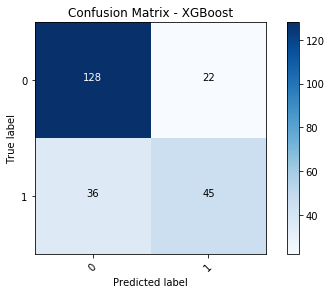

In [14]:
cm_xgb = confusion_matrix(y_test, preds_xgb)

plot_confusion_matrix(cm_xgb, classes=['0', '1'], title='Confusion Matrix - XGBoost', normalize=False)

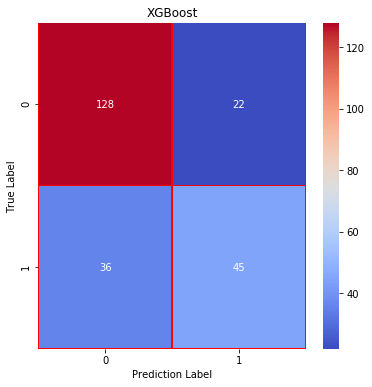

In [15]:
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm_xgb, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax, cmap='coolwarm')
plt.xlabel("Prediction Label")
plt.ylabel("True Label")
plt.title("XGBoost")
plt.show()

In [16]:
print("....................................")
print(classification_report(y_test, preds_xgb))

....................................
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       150
           1       0.67      0.56      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



In [17]:
onemli_par = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
})

onemli_par = onemli_par.sort_values(by='Importance', ascending=False)
onemli_par = onemli_par.set_index('Feature')
onemli_par

,Importance
Feature,
Glucose,0.240252
BMI,0.128526
Pregnancies,0.119272
Age,0.118920
DiabetesPedigreeFunction,0.111623
Insulin,0.107636
SkinThickness,0.087904
BloodPressure,0.085866


### Uygulama-2 (Regresyon)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBRegressor as xgbr

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data["price"] = boston.target

In [19]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric oxide concentration (parts per 10 million)
- **RM:** Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property tax rate per 10,000 (dolar)
- **PTRATIO:** Pupil-teacher ratio by town
- **B:** 1000(Bk — 0.63)², where Bk is the proportion of by town
- **LSTAT:** Percentage of lower status of the population
- **Price:** Median value of owner-occupied homes in 1000s (dolar)

In [20]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

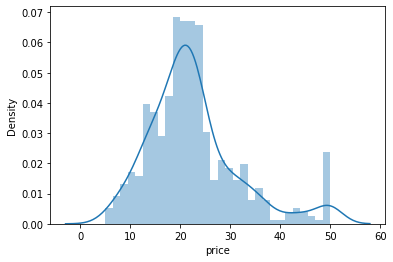

In [21]:
sns.distplot(data['price'], bins=30)
plt.show()

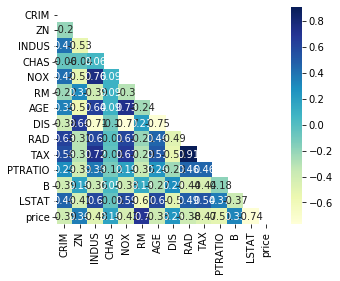

In [22]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data.corr().round(2), square=True, cmap='YlGnBu', annot=True, mask=mask);

In [23]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SVR - Regresyon

In [25]:
from sklearn.svm import LinearSVR

eps=5
penalty = 0.01
svr = LinearSVR(C=penalty, epsilon=eps, fit_intercept=True)
svr.fit(X_train, y_train)
yhat = svr.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print("SVR için RMSE = {:,.2f}".format(rmse))

SVR için RMSE = 6.57


In [27]:
print("SVR için R2 değeri = {:,.3f}".format(r2_score(y_test, yhat)))

SVR için R2 değeri = 0.420


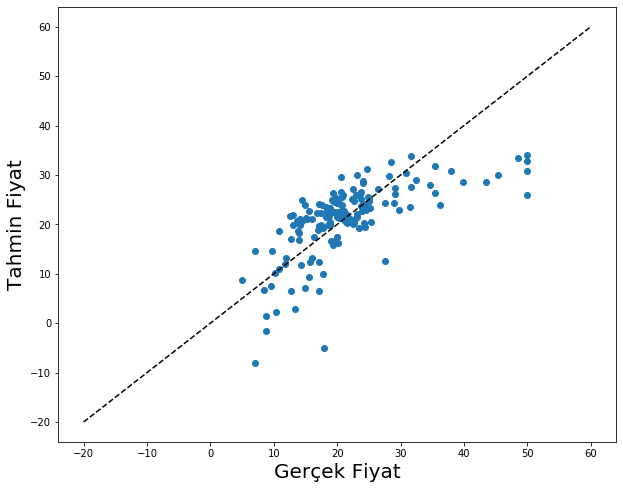

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, yhat)
plt.plot([-20, 60], [-20, 60], '--k')
plt.axis('tight')
plt.ylabel('Tahmin Fiyat', fontsize=20);
plt.xlabel('Gerçek Fiyat', fontsize=20);
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [29]:
residual_svr = (y_test - yhat)

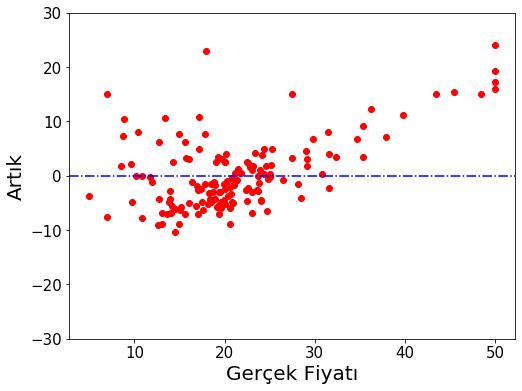

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, residual_svr, c="r")
plt.axhline(y=0, color='blue', linestyle='-.')
plt.xlabel("Gerçek Fiyatı", fontsize=20)
plt.ylabel("Artık", fontsize=20)
plt.ylim(-30,30)
plt.show()

### Random Forest - Regresyon

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
yhat_rfr = rfr.predict(X_test)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_rfr))
print("RFR için RMSE = {:,.2f}".format(rmse))

RFR için RMSE = 3.08


In [33]:
print("Random Forest için R2 değeri = {:,.3f}".format(r2_score(y_test, yhat_rfr)))

Random Forest için R2 değeri = 0.872


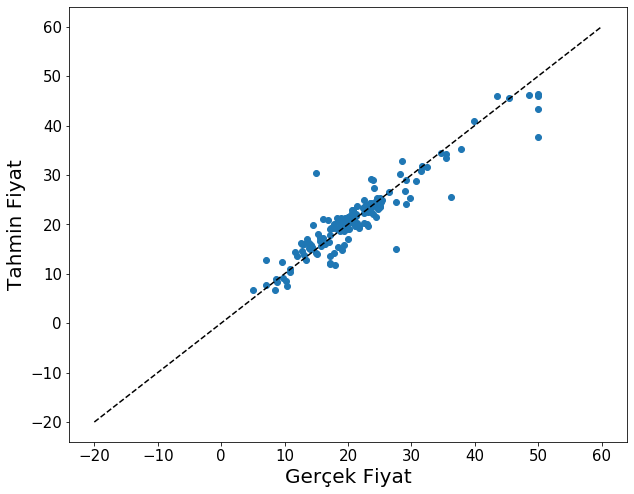

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, yhat_rfr)
plt.plot([-20, 60], [-20, 60], '--k')
plt.axis('tight')
plt.ylabel('Tahmin Fiyat', fontsize=20);
plt.xlabel('Gerçek Fiyat', fontsize=20);
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [35]:
residual_rfr = (y_test - yhat_rfr)

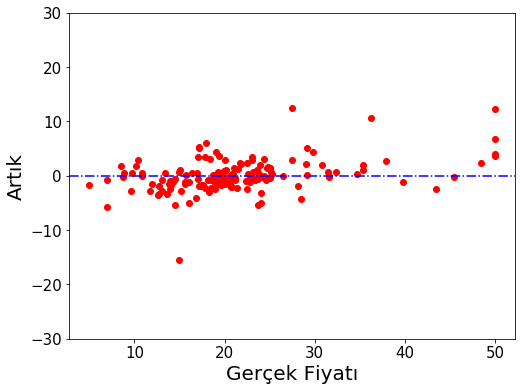

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, residual_rfr, c="r")
plt.axhline(y=0, color='blue', linestyle='-.')
plt.xlabel("Gerçek Fiyatı", fontsize=20)
plt.ylabel("Artık", fontsize=20)
plt.ylim(-30,30)
plt.show()

In [37]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfr.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
LSTAT,0.425826
RM,0.389595
DIS,0.061233
CRIM,0.031867
PTRATIO,0.018732
AGE,0.016165
TAX,0.013813
B,0.012616
NOX,0.011938


### XGBoost - Regresyon

In [38]:
xgbr?

In [39]:
xg_reg = xgbr(objective ='reg:linear')

In [40]:
xg_reg.fit(X_train,y_train)
yhat_xgb = xg_reg.predict(X_test)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_xgb))
print("XGBoost için RMSE: %f" % (rmse))

XGBoost için RMSE: 3.092177


In [42]:
print("XGBoost için R2 değeri = {:,.3f}".format(r2_score(y_test, yhat_xgb)))

XGBoost için R2 değeri = 0.872


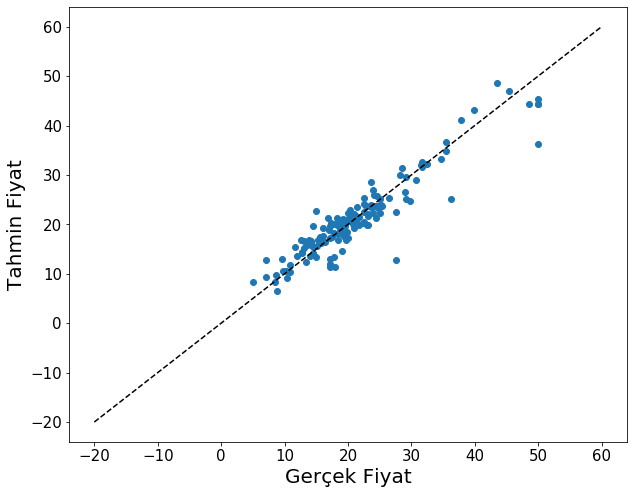

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, yhat_xgb)
plt.plot([-20, 60], [-20, 60], '--k')
plt.axis('tight')
plt.ylabel('Tahmin Fiyat', fontsize=20);
plt.xlabel('Gerçek Fiyat', fontsize=20);
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [44]:
residual_xgb = (y_test - yhat_xgb)

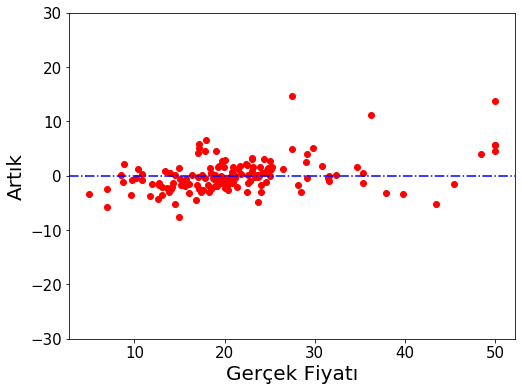

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, residual_xgb,c="r")
plt.axhline(y=0, color='blue', linestyle='-.')
plt.xlabel("Gerçek Fiyatı", fontsize=20)
plt.ylabel("Artık", fontsize=20)
plt.ylim(-30,30)
plt.show()

### XGBoost için Parametre Değerlendirme

In [46]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xg_reg.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
LSTAT,0.485060
RM,0.263453
PTRATIO,0.060353
NOX,0.050834
DIS,0.031968
CRIM,0.021716
TAX,0.021288
CHAS,0.015325
B,0.014217


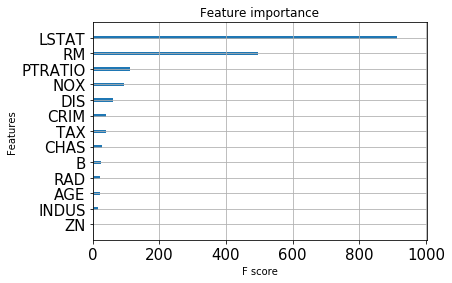

In [47]:
from xgboost import plot_importance, DMatrix, train, plot_tree
import matplotlib.pyplot as plt
#plt.figure(figsize=(6,6))
plot_importance(xg_reg.get_booster().get_score(importance_type='gain'), show_values=False)
#plt.rcParams['figure.figsize'] = [6,6]
plt.show()

In [48]:
data_dmatrix = DMatrix(data=X,label=y)

In [49]:
params = {"objective":"reg:linear"}
xg_reg2 = train(params=params, dtrain=data_dmatrix)

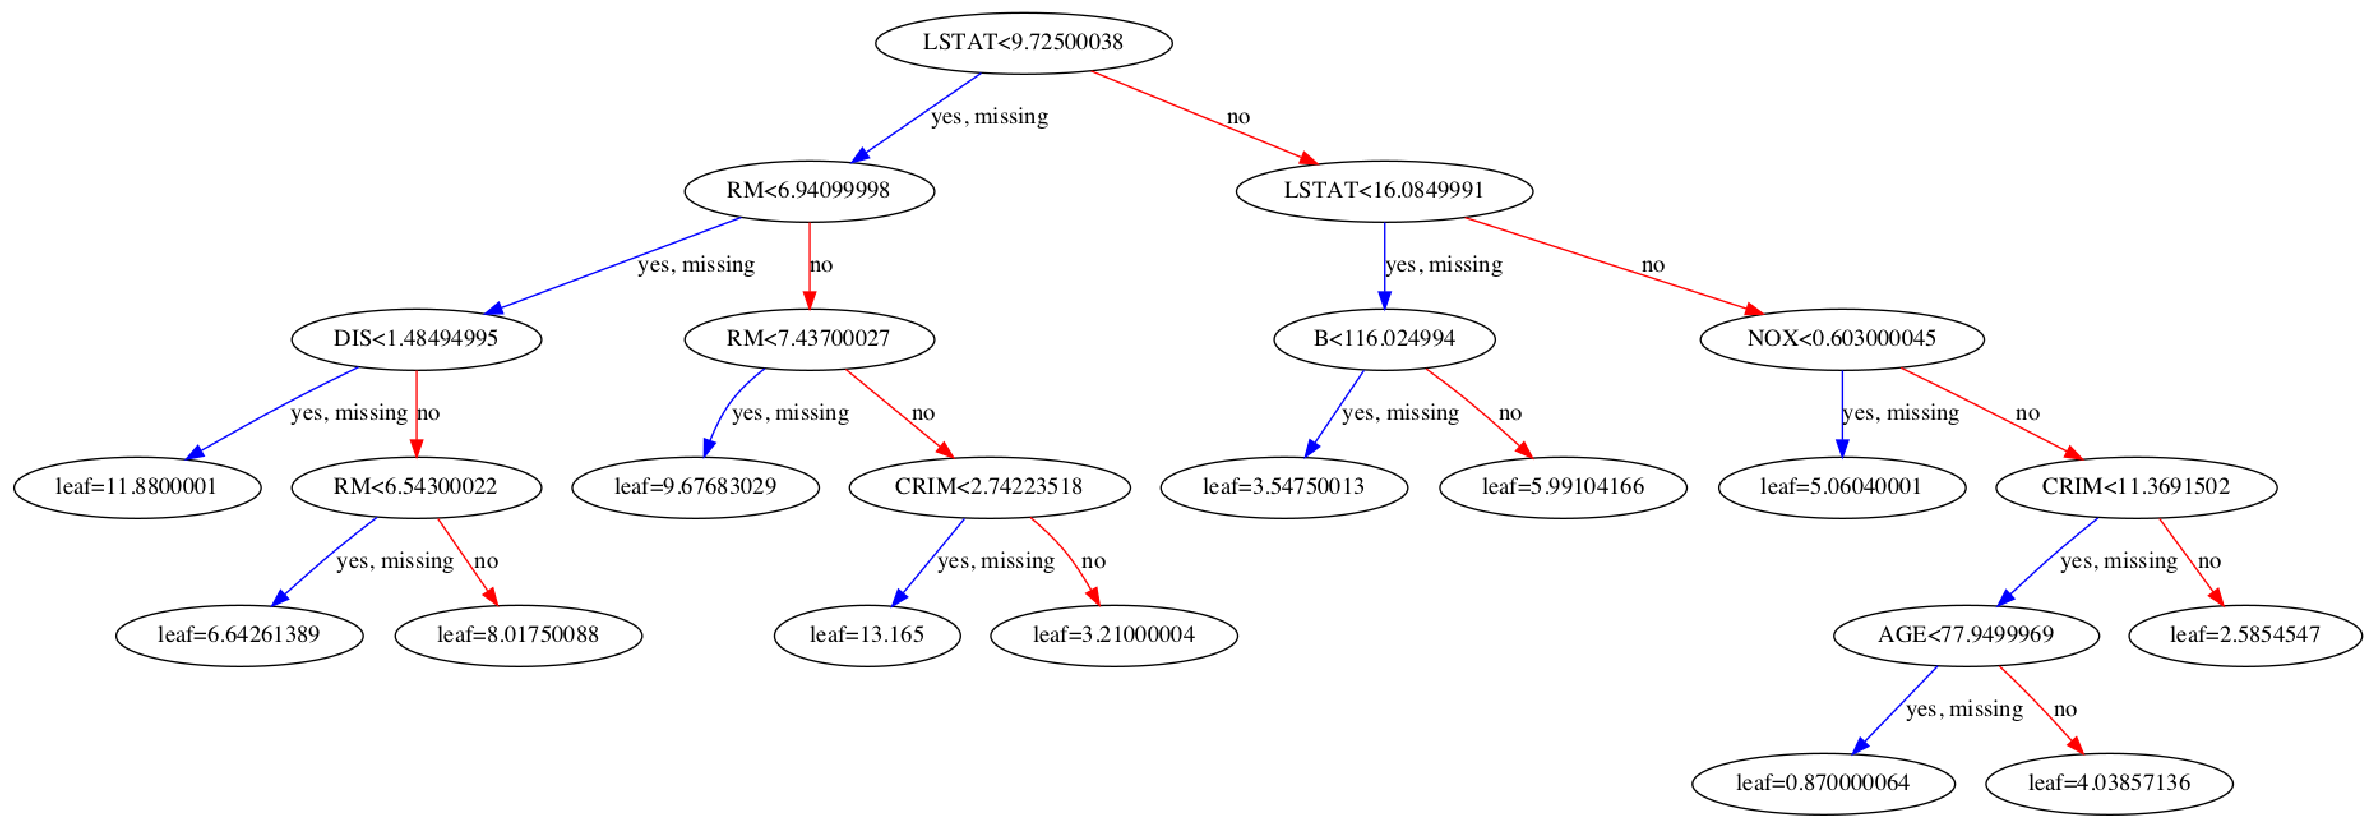

In [53]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(50,30))
plot_tree(xg_reg2, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 15]
plt.show()

### Statsmodels kütüphanesiyle - Linear Fit 

In [54]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
sonuclar = model.fit()
print(sonuclar.summary())

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 25 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        12:31:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### Uygulama-3 (Sınıflandırma)

In [55]:
from collections import Counter
from sklearn.datasets import make_classification

In [56]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, 
                           weights=[0.99], flip_y=0, random_state=42)

counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


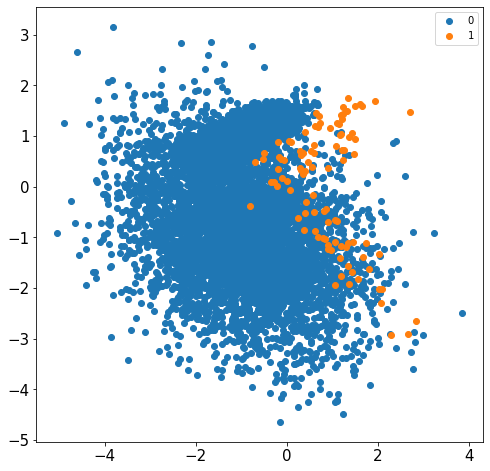

In [57]:
plt.figure(figsize=(8,8))
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [59]:
print("Eğitim verisi için sınıf dağılımları: ", Counter(y_train))
print("Test verisi için sınıf dağılımları: ", Counter(y_test))

Eğitim verisi için sınıf dağılımları:  Counter({0: 5940, 1: 60})
Test verisi için sınıf dağılımları:  Counter({0: 3960, 1: 40})


In [60]:
model = XGBClassifier().fit(X_train, y_train)
yhat = model.predict(X_test)

In [61]:
print("Doğruluk: ", accuracy_score(y_test, yhat))

Doğruluk:  0.9915


In [62]:
confusion_matrix(y_test, yhat)

array([[3956,    4],
       [  30,   10]])

In [63]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3960
           1       0.71      0.25      0.37        40

    accuracy                           0.99      4000
   macro avg       0.85      0.62      0.68      4000
weighted avg       0.99      0.99      0.99      4000



### Dengesiz veri setleri için ağırlık parametresi (XGBoost)

In [64]:
model2 = XGBClassifier(scale_pos_weight=50).fit(X_train, y_train)
yhat2 = model2.predict(X_test)

In [65]:
print("Doğruluk: ", accuracy_score(y_test, yhat2))

Doğruluk:  0.96025


In [66]:
confusion_matrix(y_test, yhat2)

array([[3807,  153],
       [   6,   34]])

In [67]:
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3960
           1       0.18      0.85      0.30        40

    accuracy                           0.96      4000
   macro avg       0.59      0.91      0.64      4000
weighted avg       0.99      0.96      0.97      4000



### Destek Vektör Makinleri ile Sınıflandırma

In [68]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train, y_train)
yhat = svm.predict(X_test)

In [69]:
print("Doğruluk: ", accuracy_score(y_test, yhat))

Doğruluk:  0.99125


In [70]:
confusion_matrix(y_test, yhat)

array([[3959,    1],
       [  34,    6]])

**Kaynaklar:**
- https://xgboost.readthedocs.io/en/latest/tutorials/model.html
- https://arxiv.org/pdf/1603.02754.pdf
- Ahmet Kuzubaşlı, https://medium.com/@ahmetkuzubasli/neden-ilk-adresiniz-xgboost-75010416a583
- Gülçin Yaygın, "XGBOOST VE KARAR AĞACI TABANLI ALGORİTMALARIN
DİYABET VERİ SETLERİ ÜZERİNE UYGULAMASI" (Y.Lisans Tezi)
- Fehim Kurucan, "BÜYÜK VERİ VE FİNANSAL PİYASALARDA İSTATİSTİKİ MAKİNE ÖĞRENMESİ METODLARININ YATIRIM KARARLARINDA KULLANILMASI" (Y. Lisans Tezi)
- Mustafa Vahit Keskin, https://www.udemy.com/course/python-ile-makine-ogrenmesi/learn/lecture/17867712#overview
- Emre Rıdvan Muratlar, https://www.veribilimiokulu.com/blog/xgboost-nasil-calisir/